# Perform Imports and Load Data
For this exercise we'll be using the **SMSSpamCollection** dataset from [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) that contains more than 5 thousand SMS phone messages.

The file is a tab-separated-values (tsv) file with 2 columns:
<br><br>
**label** - every message is labeled as either ***ham*** or ***spam***<br>
**message** - the text message<br>

Later in this tutorial we'll add 2 additional columns to see if they can help us distinguish between **HAM** and **SPAM**.


**length** - the number of characters in each text message<br>
**punct** - the number of punctuation characters in each text message

Firstly we need to import the csv files into Python. We'll use the `pandas` library to read the csv file and to perform some general manipulation of the csv file contents.

Before you import the csv file, download the compressed file **SMSSpamCollection.zip** from Blackboard and then extract the contents of it to the working folder of your program code. In this example, a new folder called **SMSSpamCollection is created in my working directory folder. This folder contains a ** readme** file and the `tsv file` called **SMSSpamCollection**.

In [ ]:
import numpy as np
import pandas as pd
import io

In [ ]:
# Read tsv file into a dataframe object
# Press tab to check you are in the correct folder location and to browse
# to the tsv file
# The sep command indicates this files is separated by tabs
from google.colab import files
uploaded = files.upload()
# Read tsv file into a dataframe object
# Press tab to check you are in the correct folder location and to browse
# to the tsv file
# The sep command indicates this files is separated by tabs
dataframe = pd.read_csv(io.BytesIO(uploaded['SMSSpamCollection.tsv']), sep="\t")

Saving SMSSpamCollection.tsv to SMSSpamCollection (1).tsv


In [ ]:
# Show first 5 rows of dataframe
dataframe.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


One of the methods we could use to determine whether a text message is **HAM** or **SPAM** is through examination of the length of characters in each line of text.

Let's create a loop that uses a list to contain the number of characters within each line. then we'll add the lenght to the end of each row in the dataframe.

In [ ]:
message_length_col = []
for index, row in dataframe.iterrows():
    length_message_text = len(row.message)
    # add the length of each message to list
    message_length_col.append(length_message_text)

In [ ]:
# Show message length col contents
message_length_col

[111,
 29,
 155,
 49,
 61,
 147,
 77,
 160,
 157,
 154,
 109,
 136,
 155,
 196,
 35,
 149,
 26,
 81,
 56,
 155,
 41,
 47,
 52,
 88,
 57,
 144,
 30,
 134,
 75,
 64,
 130,
 189,
 29,
 84,
 158,
 122,
 47,
 28,
 27,
 155,
 82,
 142,
 172,
 19,
 72,
 32,
 45,
 31,
 67,
 148,
 58,
 124,
 80,
 289,
 120,
 76,
 161,
 34,
 22,
 40,
 108,
 48,
 25,
 56,
 110,
 152,
 122,
 159,
 78,
 34,
 46,
 29,
 45,
 42,
 20,
 43,
 73,
 50,
 42,
 76,
 22,
 32,
 32,
 36,
 14,
 55,
 121,
 144,
 42,
 41,
 58,
 195,
 141,
 137,
 107,
 158,
 33,
 51,
 178,
 31,
 57,
 81,
 76,
 160,
 183,
 44,
 95,
 43,
 82,
 115,
 30,
 40,
 31,
 96,
 158,
 143,
 156,
 152,
 72,
 86,
 144,
 156,
 53,
 156,
 52,
 38,
 20,
 244,
 22,
 107,
 28,
 9,
 39,
 25,
 125,
 162,
 38,
 34,
 46,
 155,
 85,
 33,
 27,
 156,
 42,
 25,
 48,
 159,
 84,
 33,
 30,
 45,
 59,
 25,
 160,
 384,
 28,
 27,
 157,
 124,
 145,
 115,
 64,
 85,
 152,
 155,
 51,
 156,
 74,
 67,
 59,
 50,
 94,
 33,
 105,
 61,
 65,
 26,
 146,
 66,
 126,
 159,
 23,
 65,
 24,
 26,
 1

Next we'll add this list to the dataframe. I'm also inserting this data under the column heading **length**.

See this link for further information 
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [ ]:
# now we'll add the contents of this list to a new column
# called "length" to the end of our dataframe
# See https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
dataframe['length'] = message_length_col

In [ ]:
# Lets look at the top of the datagrame
dataframe.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
dataframe.tail()
#dataframe.tail()

,label,message,length
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


## Check for missing values:
Machine learning models usually require complete data. Here's a quick method that allows us to evaluate if there are any missing values in our dataset. How you should deal with missing data is an entire topic area on its own.

In [ ]:
dataframe.isnull()

,label,message,length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5567,False,False,False
5568,False,False,False
5569,False,False,False
5570,False,False,False


And we can summarise this data using the `.sum()` command. The summary shows that we don't have any missing values in the dataset.

In [ ]:
# A "1" indicates missing data
dataframe.isnull().sum()

label      0
message    0
length     0
dtype: int64

In [ ]:
# Show length of messages we have in the dataframe
len(dataframe)

5572

Lets examine how many **HAM** and **SPAM** messages we have

In [ ]:
dataframe['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Visualise the length data:
Since we're not ready to do anything with the semantics of the message text just yet, let's see if we can predict **ham** and **Spam** labels based on message length count. We'll look at message `length` column for this.

Lets look at descriptive statistics that summarise the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. See this link for more information

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [ ]:
dataframe["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

We can see that the **length** data is skewed since the mean text length is 80 characters, but the maximum text length is 910 characters.

Lets see what the descriptive statistics look like for messages identified as **ham** within the dataset.

In [ ]:
ham_data = []
spam_data = []
for index, row in dataframe.iterrows():
    # If the label data is recognised to be "ham"
    if row["label"] == "ham":
        ham_data.append(row)
    else:
        spam_data.append(row)

# Convert list to a dataframe before performing descriptive statistics on it
ham_dataframe = pd.DataFrame(ham_data)
spam_dataframe = pd.DataFrame(spam_data)

In [ ]:
ham_dataframe.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [ ]:
ham_dataframe["length"].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
spam_dataframe["length"].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64

From the data we can see that the mean ham text message is 71 characters long versus 138 characters for spam. But the maximum ham text message is 910 charcaters long. This could be an outlier with lots of unused spaces. The maximum text message size for spam is 223 characters. There's a larger spread of SD values for **ham** versus **spam**. We could argue therefore that the number of characters in a spam message are closer to the mean expected value than ham messages which shows a wider spread of values. This could indicate that spam text messages contain similar numbers of characters in a text message.

We can look at this problem in more detail. We'll use the `matplotlib` library to do this and we'll plot this data on a logarithmic x-axis. See this link for an explanation of the benefits in using a log scale to plot our data https://www.forbes.com/sites/naomirobbins/2012/01/19/when-should-i-use-logarithmic-scales-in-my-charts-and-graphs/#58efc4eb5e67. We'll use the log scale to show the percentage change or multiplicative factors in the length of each text message.

See https://matplotlib.org/ for further information on how to manipulate settings for your charts.

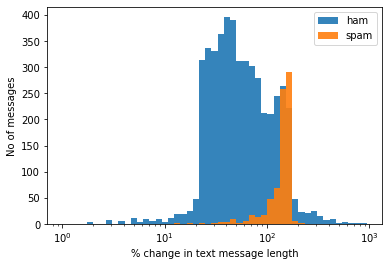

In [ ]:
import matplotlib.pyplot as mat_plot_lib
# Enable the inline backend for usage with the IPython Notebook
%matplotlib inline

mat_plot_lib.xscale('log')
mat_plot_lib.xlabel('% change in text message length')
mat_plot_lib.ylabel('No of messages')
bins = 1.15**(np.arange(0,50))
mat_plot_lib.hist(dataframe[dataframe['label']=='ham']['length'],bins=bins,alpha=0.9)
mat_plot_lib.hist(dataframe[dataframe['label']=='spam']['length'],bins=bins,alpha=0.9)
mat_plot_lib.legend(('ham','spam'))
mat_plot_lib.show()

There's generally a lot more text in a **SPAM** message versus a **HAM** message. This is typical of a text message. A person may send a few words of text in a genuine text message, whereas a **SPAM** message is going to contain a lot more text since it has more information to give to the text reader.

There's a small range of message lengths where a message could be categorised as **SPAM** rather than **HAM**. 

This will not be good enough to help us distinguish **HAM** from **SPAM**. 

What about the number of punctuation marks in a text message? Could that help? Lets add the `punct` data to the data frame using what we already know about the `NLP` library.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Define variables first
punct_length_col = []
punct_count = 0

for index, textrow in dataframe.iterrows():
    doc_object = nlp(textrow.message)
    for word in doc_object:
        if word.pos_ == 'PUNCT':           
            punct_count += 1
    # Sentence is checked so add count to list
    punct_length_col.append(punct_count)
    punct_count =0   

It is important to ensure that the list we're going to insert into the text dataframe contaisn the same number of rows. Otherwise we'll get an error.

In [ ]:
# Check list contains same number of items as dataframe row count
print(len(punct_length_col))
print(len(dataframe))

5572
5572


In [ ]:
#Add punct list to dataframe
dataframe['punct'] = punct_length_col

In [ ]:
# View top of dataframe content
dataframe.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,4
1,ham,Ok lar... Joking wif u oni...,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1


Let's examine some desxcriptive statistics of the punctuation data.

In [ ]:
dataframe["punct"].describe()

count    5572.000000
mean        2.510230
std         2.690404
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        56.000000
Name: punct, dtype: float64

We can see that the data is also skewed. The mean punctuations in a text message is 2. The maximum number of punctuations in a text is 58. People use punctuations in text differently. Some may use it for emoji constructions such as :-).

Lets see what the spread of punctuations are across either ham or spam text messages.

Let's examine the spread of punctuation using a log chart.

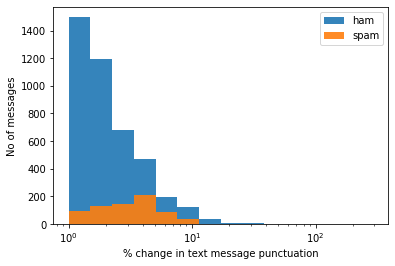

In [ ]:
mat_plot_lib.xscale('log')
mat_plot_lib.xlabel('% change in text message punctuation')
mat_plot_lib.ylabel('No of messages')
bins = 1.5**(np.arange(0,15))
mat_plot_lib.hist(dataframe[dataframe['label']=='ham']['punct'],bins=bins,alpha=0.9)
mat_plot_lib.hist(dataframe[dataframe['label']=='spam']['punct'],bins=bins,alpha=0.9)
mat_plot_lib.legend(('ham','spam'))
mat_plot_lib.show()

There could be enough difference between text length in **SPAM** texts versus **HAM** ones to uniquely identify one against the other, but there is not as distinct difference between the number of punctuations in **HAM** messages compared to **SPAM**.

We'll now create a ML model using `scikit learn`. In the next lecture we'll use the text content to build a more accurate ML model.
 